# Google Play Store Analysis

The aim of this project is to conduct an exploratory data analysis (EDA) on a mobile app dataset to uncover patterns and insights related to app performance and user engagement. Additionally, we will identify and analyze outliers that may impact the data quality and model accuracy. Finally, we will apply machine learning techniques to predict app success factors and enhance decision-making in app development and marketing strategies.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('googleplaystore.csv')

In [3]:
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
dataset['Reviews']=dataset['Reviews'].astype(str).str.replace('3.0M', '3000000')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\578918974.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Reviews']=dataset['Reviews'].astype(str).str.replace('3.0M', '3000000')


In [5]:
dataset['Reviews']=dataset['Reviews'].astype(int)

In [6]:
dataset['Installs'] = dataset['Installs'].astype(str).str.replace('+', '')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\2176049241.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Installs'] = dataset['Installs'].astype(str).str.replace('+', '')


In [7]:
dataset['Installs'] = dataset['Installs'].astype(str).str.replace(',', '')

In [8]:
dataset['Installs'] = dataset['Installs'].astype(str).str.replace('Free', '0')

In [9]:
dataset['Installs']=dataset['Installs'].astype(int)

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
str_impute=SimpleImputer(strategy='most_frequent')
num_impute=SimpleImputer(strategy='mean')

In [12]:
num_cat=['Rating']
str_cat=['Type','Content Rating','Current Ver','Android Ver']

In [13]:
dataset[num_cat]=num_impute.fit_transform(dataset[num_cat])
dataset[str_cat]=str_impute.fit_transform(dataset[str_cat])

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int32  
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), int32(2), object(10)
memory usage: 1016.5+ KB


# **EDA**

Text(0.5, 0.98, 'Distribution of App Ratings')

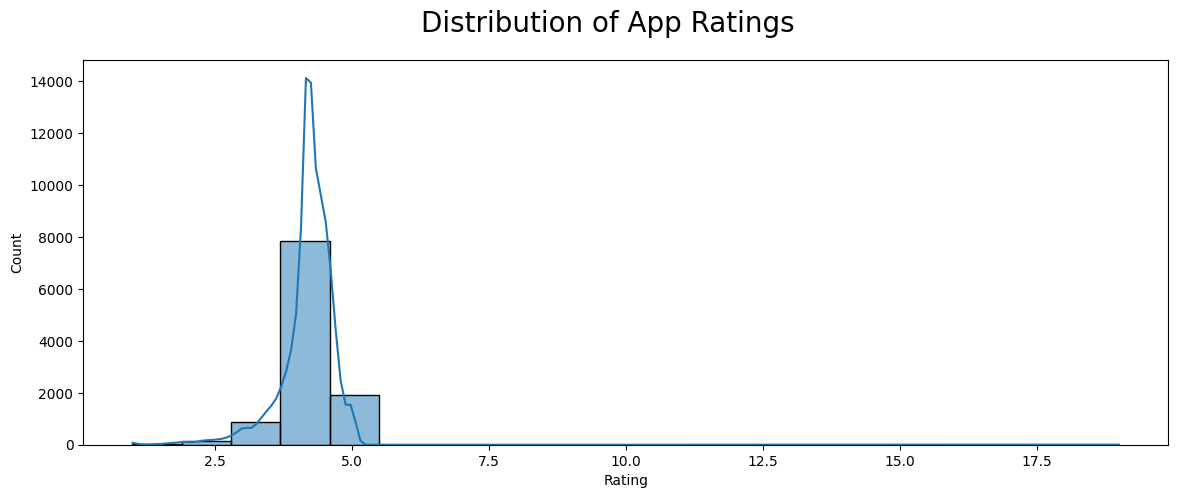

In [15]:
plt.figure(figsize=(14,5))
sns.histplot(dataset['Rating'], bins=20, kde=True)
plt.suptitle('Distribution of App Ratings',fontsize=20)

Text(0.5, 0.98, 'Rating by Category')

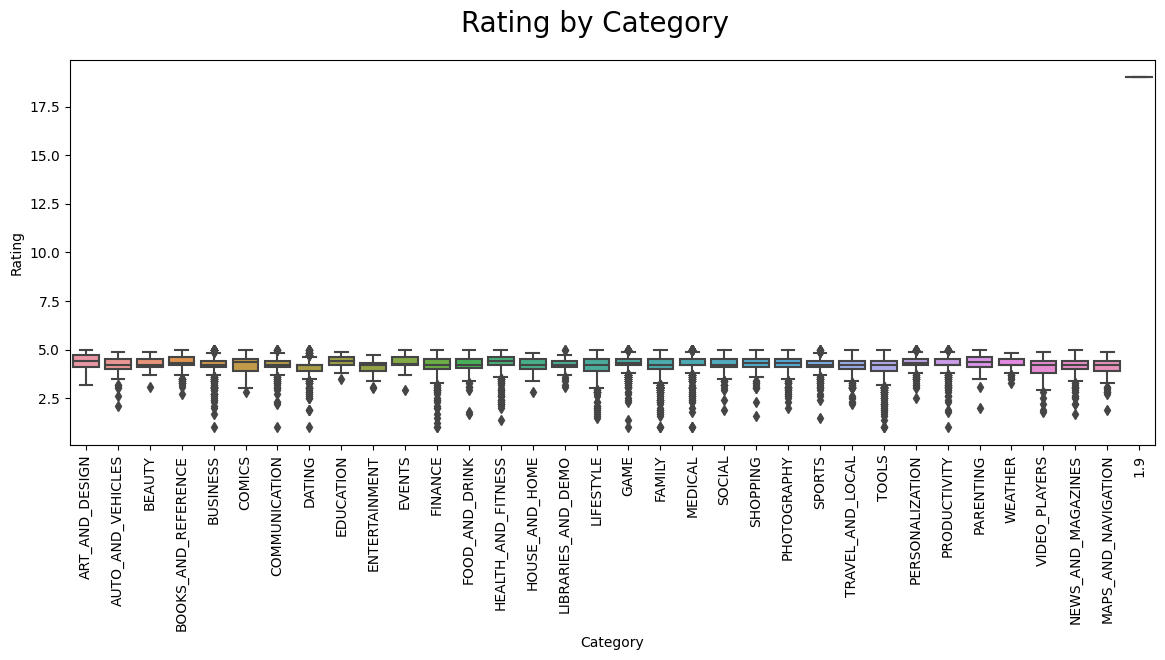

In [16]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Category', y='Rating', data=dataset)
plt.xticks(rotation=90)
plt.suptitle('Rating by Category',fontsize=20)

Text(0.5, 0.98, 'Count of Free vs Paid Apps')

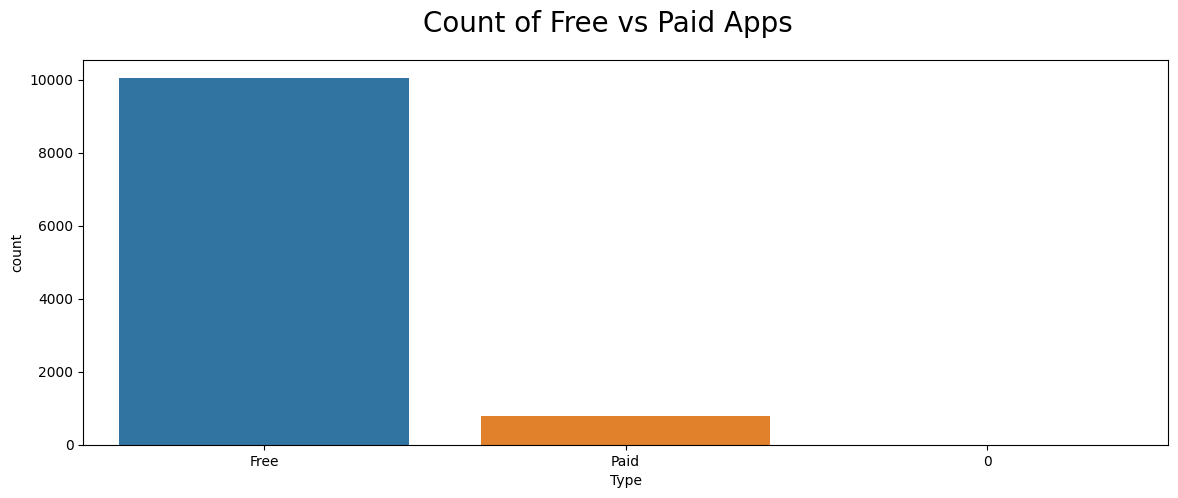

In [17]:
plt.figure(figsize=(14,5))
sns.countplot(x='Type', data=dataset)
plt.suptitle('Count of Free vs Paid Apps',fontsize=20)

Text(0.5, 0.98, 'Count of Free vs Paid Apps')

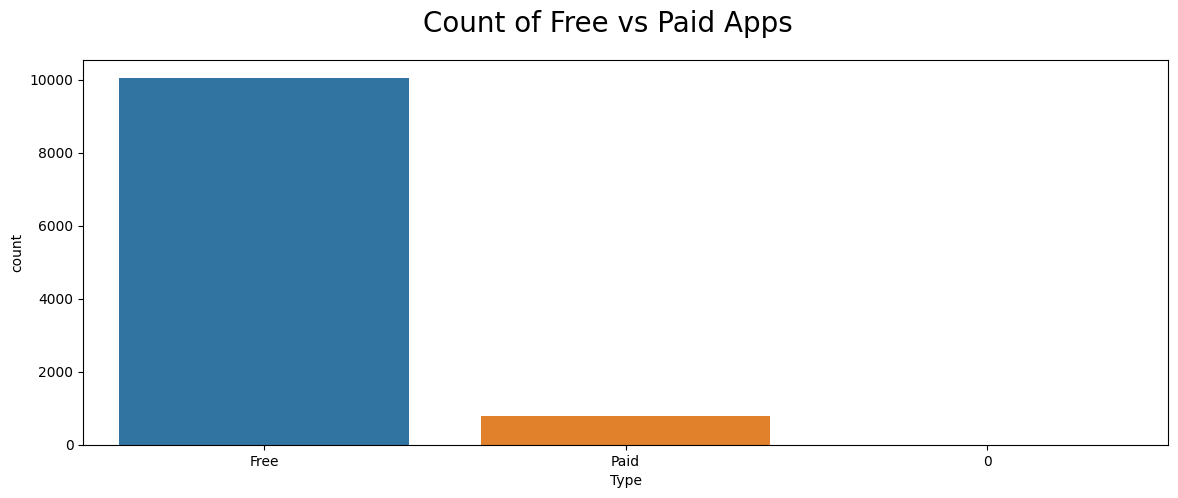

In [18]:
plt.figure(figsize=(14,5))
sns.countplot(x='Type', data=dataset)
plt.suptitle('Count of Free vs Paid Apps',fontsize=20)

Text(0.5, 0.98, 'Installs vs Rating')

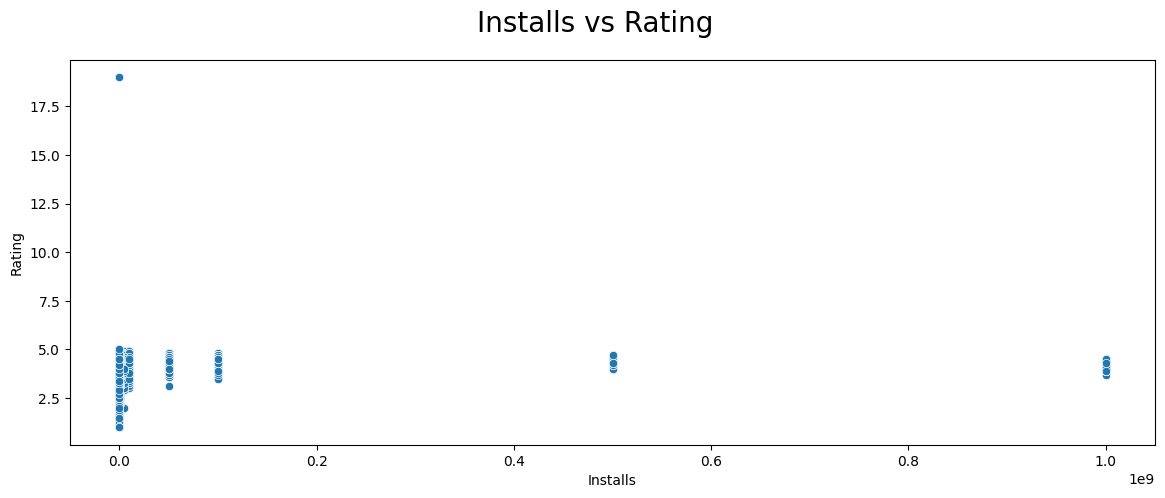

In [19]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='Installs', y='Rating', data=dataset)
plt.suptitle('Installs vs Rating',fontsize=20)

Text(0.5, 1.0, 'Average Ratings by Category')

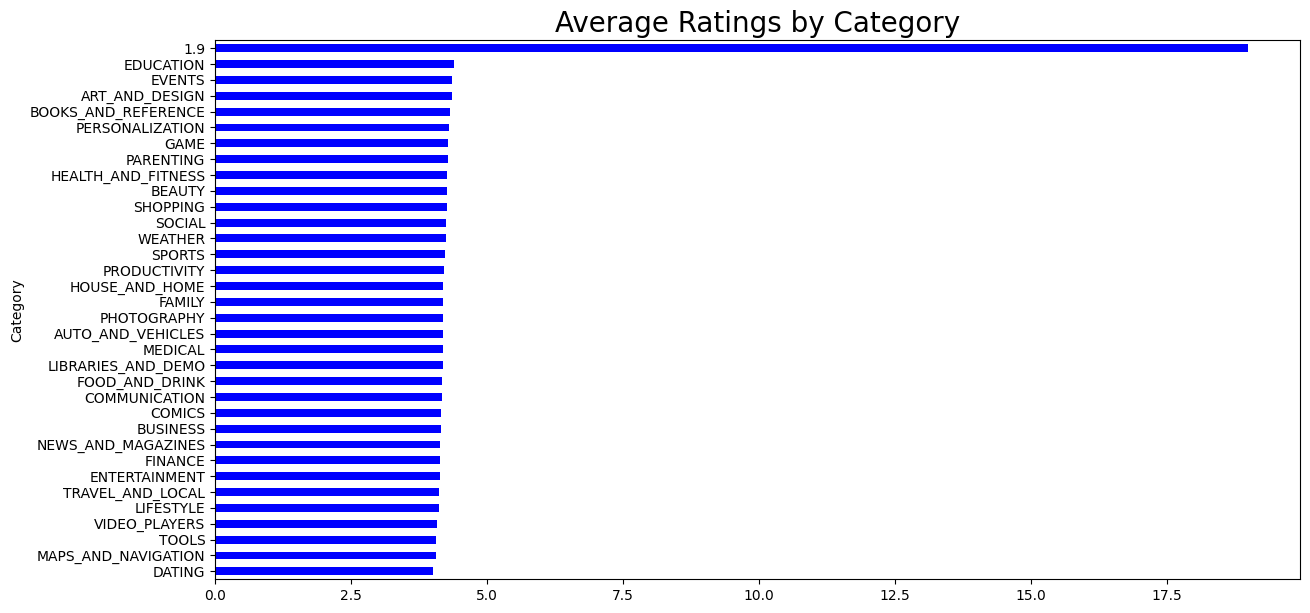

In [20]:
plt.figure(figsize=(14,7))
avg_rating_by_category = dataset.groupby('Category')['Rating'].mean().sort_values()
avg_rating_by_category.plot(kind='barh', color='blue')
plt.title('Average Ratings by Category',fontsize=20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\3161908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr()


Text(0.5, 0.98, 'Correlation Matrix')

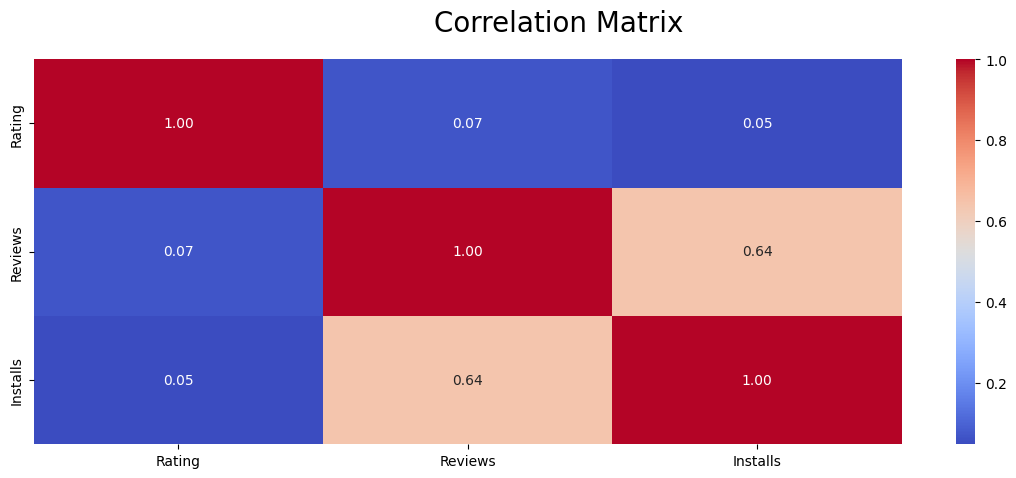

In [21]:
corr_matrix = dataset[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr()
plt.figure(figsize=(14,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.suptitle('Correlation Matrix',fontsize=20)

# **Outliers**

Text(0.5, 0.98, 'Boxplot of Ratings')

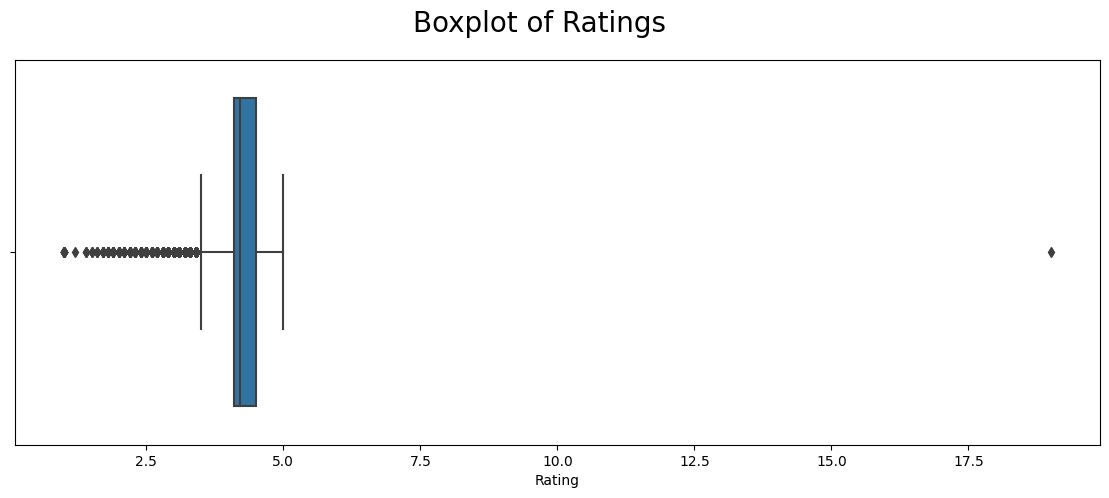

In [22]:
plt.figure(figsize=(14,5))
sns.boxplot(x=dataset['Rating'])
plt.suptitle('Boxplot of Ratings',fontsize=20)

Text(0.5, 0.98, 'Boxplot of Reviews')

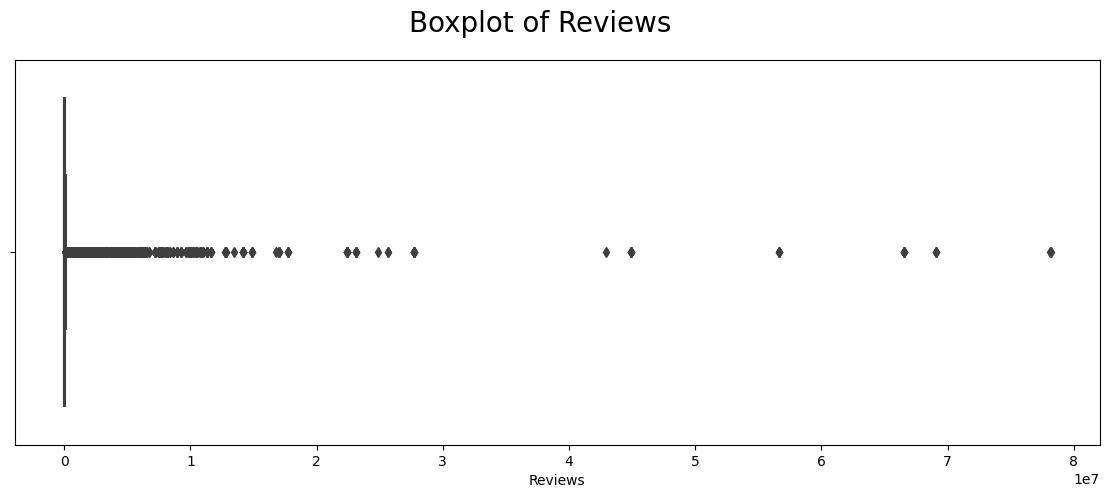

In [23]:
plt.figure(figsize=(14,5))
sns.boxplot(x=dataset['Reviews'])
plt.suptitle('Boxplot of Reviews',fontsize=20)

Text(0.5, 0.98, 'Boxplot of Installs')

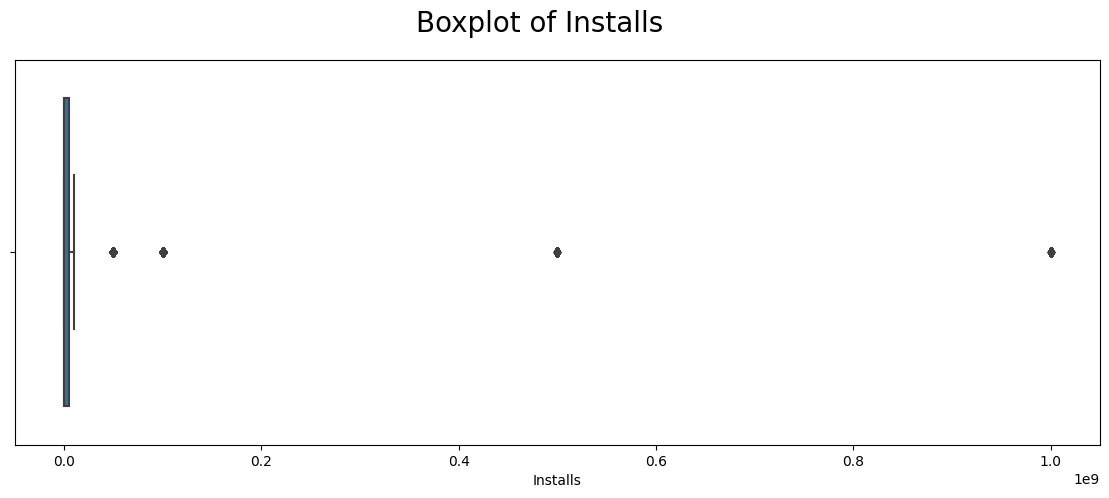

In [24]:
plt.figure(figsize=(14,5))
sns.boxplot(x=dataset['Installs'])
plt.suptitle('Boxplot of Installs',fontsize=20)

In [25]:
#importing the necassery libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [26]:
#creating an object for the preprocessing
lab=LabelEncoder()
std=StandardScaler()

In [27]:
dataset['App']=lab.fit_transform(dataset['App'])
dataset['Category']=lab.fit_transform(dataset['Category'])
dataset['Type']=lab.fit_transform(dataset['Type'])
dataset['Content Rating']=lab.fit_transform(dataset['Content Rating'])
dataset['Genres']=lab.fit_transform(dataset['Genres'])
dataset['Size']=lab.fit_transform(dataset['Size'])
dataset['Price']=lab.fit_transform(dataset['Price'])
dataset['Last Updated']=lab.fit_transform(dataset['Last Updated'])
dataset['Current Ver']=lab.fit_transform(dataset['Current Ver'])
dataset['Android Ver']=lab.fit_transform(dataset['Android Ver'])

In [28]:
dataset['Rating']=std.fit_transform(dataset['Rating'].values.reshape(-1,1))
dataset['Reviews']=std.fit_transform(dataset['Reviews'].values.reshape(-1,1))
dataset['Installs']=std.fit_transform(dataset['Installs'].values.reshape(-1,1))

In [29]:
#Splitting the dataset to X and Y.
x=dataset[['App','Category','Reviews','Size','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Android Ver','Installs']]
y=dataset[['Rating']]

# **Splitting the dataset**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# **Importing the machine learning model and fitting the dataset**

In [32]:
#Importing the machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [33]:
model_1=LinearRegression()

In [34]:
model_1.fit(x_train,y_train)

LinearRegression()

In [35]:
model_1.score(x_train,y_train)

0.018653226347869256

In [36]:
y_pred_1=model_1.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,median_absolute_error

In [38]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_1))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_1))
print('R2_score',r2_score(y_test,y_pred_1))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_1))

Mean_Squared_error 0.9017397065337437
Mean_Absolute_error 0.6262626895482355
R2_score 0.013914433186410946
Median_absolute_error 0.41663459991967516


In [39]:
model_2=DecisionTreeRegressor()

In [40]:
model_2.fit(x_train,y_train)

DecisionTreeRegressor()

In [41]:
model_2.score(x_train,y_train)

1.0

In [42]:
y_pred_2=model_2.predict(x_test)

In [43]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_2))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_2))
print('R2_score',r2_score(y_test,y_pred_2))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_2))

Mean_Squared_error 1.4969104620162694
Mean_Absolute_error 0.7421317424319372
R2_score -0.6369266992583835
Median_absolute_error 0.4003728619324549


In [44]:
model_3=SVR()

In [45]:
model_3.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [46]:
model_3.score(x_train,y_train)

-0.006336474251253277

In [47]:
y_pred_3=model_3.predict(x_test)

In [48]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_3))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_3))
print('R2_score',r2_score(y_test,y_pred_3))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_3))

Mean_Squared_error 0.9261636799348675
Mean_Absolute_error 0.6162084185510642
R2_score -0.01279408090094769
Median_absolute_error 0.3896520771014421


In [49]:
model_4=RandomForestRegressor()

In [50]:
model_4.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\2507885022.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4.fit(x_train,y_train)


RandomForestRegressor()

In [51]:
model_4.score(x_train,y_train)

0.87878214985647

In [52]:
y_pred_4=model_4.predict(x_test)

In [53]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_4))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_4))
print('R2_score',r2_score(y_test,y_pred_4))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_4))

Mean_Squared_error 0.7548883468488489
Mean_Absolute_error 0.5552745469056805
R2_score 0.17450180136260307
Median_absolute_error 0.3497943186441113


In [54]:
model_5=KNeighborsRegressor()

In [55]:
model_5.fit(x_train,y_train)

KNeighborsRegressor()

In [56]:
model_5.score(x_train,y_train)

0.22850482599420208

In [57]:
y_pred_5=model_5.predict(x_test)

In [58]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_5))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_5))
print('R2_score',r2_score(y_test,y_pred_5))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_5))

Mean_Squared_error 1.0555404522968668
Mean_Absolute_error 0.710741047867777
R2_score -0.15427234450929528
Median_absolute_error 0.48311459206257523


In [59]:
model_6=GradientBoostingRegressor()

In [60]:
model_6.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [61]:
model_6.score(x_train,y_train)

0.291619097877159

In [62]:
y_pred_6=model_6.predict(x_test)

In [63]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_6))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_6))
print('R2_score',r2_score(y_test,y_pred_6))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_6))

Mean_Squared_error 0.7883500149821353
Mean_Absolute_error 0.5831224974927214
R2_score 0.13791023536117264
Median_absolute_error 0.3761679336649394


In [64]:
model_7=XGBRegressor()

In [65]:
model_7.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
model_7.score(x_train,y_train)

0.7802147169374638

In [67]:
y_pred_7=model_7.predict(x_test)

In [68]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_7))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_7))
print('R2_score',r2_score(y_test,y_pred_7))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_7))

Mean_Squared_error 0.8033048329113033
Mean_Absolute_error 0.5921717765720677
R2_score 0.12155659139115871
Median_absolute_error 0.39305276227862845


# **Visualizing the training performance**

In [69]:
#Let's enter the model name and the performance detail's
model_name=['Linear_regression','Decision_tree_Regressor','SVR','Random_forest_Regressor','KNN','Gradient_boost','XGBoost']
model_train_performance=[model_1.score(x_train,y_train),model_2.score(x_train,y_train),model_3.score(x_train,y_train),model_4.score(x_train,y_train),model_5.score(x_train,y_train),model_6.score(x_train,y_train),model_7.score(x_train,y_train)]

In [70]:
print('The Training score of Linear Regression is:',model_1.score(x_train,y_train))
print('The Training score of Decision Tree is:',model_2.score(x_train,y_train))
print('The Training score of Random Forest is:',model_3.score(x_train,y_train))
print('The Training score of KNN is:',model_4.score(x_train,y_train))
print('The Training score of SVM is:',model_5.score(x_train,y_train))
print('The Training score of GradientBoost is:',model_6.score(x_train,y_train))
print('The Training score of XGBoost is:',model_7.score(x_train,y_train))

The Training score of Linear Regression is: 0.018653226347869256
The Training score of Decision Tree is: 1.0
The Training score of Random Forest is: -0.006336474251253277
The Training score of KNN is: 0.87878214985647
The Training score of SVM is: 0.22850482599420208
The Training score of GradientBoost is: 0.291619097877159
The Training score of XGBoost is: 0.7802147169374638


Text(0.5, 0.98, 'Training Score Of Each Model')

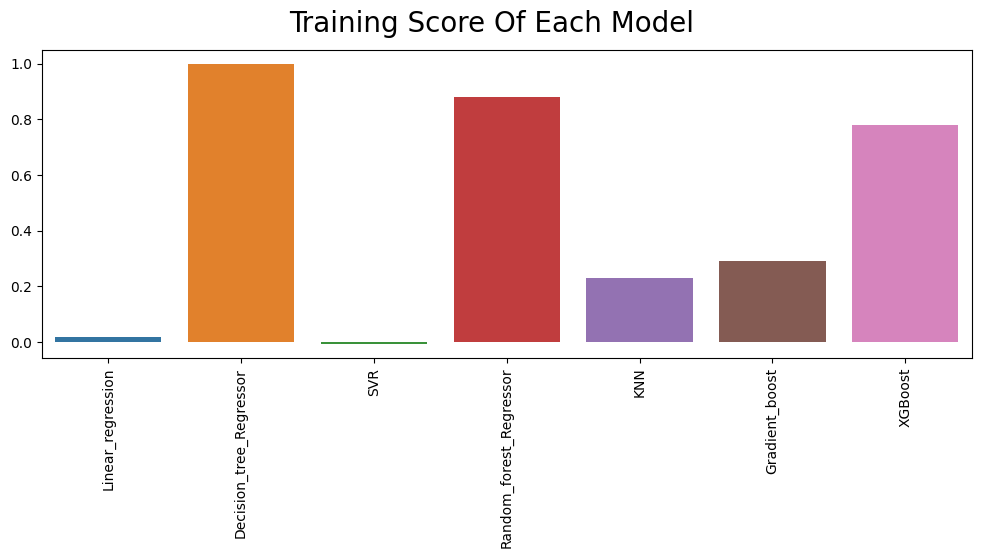

In [71]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_train_performance)
plt.xticks(rotation=90)
plt.suptitle('Training Score Of Each Model',fontsize=20)

# **Testing performance of each model**

In [72]:
model_test_performance=[mean_squared_error(y_test,y_pred_1),mean_squared_error(y_test,y_pred_2),mean_squared_error(y_test,y_pred_3),mean_squared_error(y_test,y_pred_4),mean_squared_error(y_test,y_pred_5),mean_squared_error(y_test,y_pred_6),mean_squared_error(y_test,y_pred_7)]

In [73]:
print('The Testing score of Linear Regression is:',mean_squared_error(y_test,y_pred_1))
print('The Testing score of Decision Tree is:',mean_squared_error(y_test,y_pred_2))
print('The Testing score of SVM is:',mean_squared_error(y_test,y_pred_3))
print('The Testing score of Random Forest is:',mean_squared_error(y_test,y_pred_4))
print('The Testing score of KNN is:',mean_squared_error(y_test,y_pred_5))
print('The Testing score of GradientBoost is:',mean_squared_error(y_test,y_pred_6))
print('The Testing score of XGBoost is:',mean_squared_error(y_test,y_pred_7))

The Testing score of Linear Regression is: 0.9017397065337437
The Testing score of Decision Tree is: 1.4969104620162694
The Testing score of SVM is: 0.9261636799348675
The Testing score of Random Forest is: 0.7548883468488489
The Testing score of KNN is: 1.0555404522968668
The Testing score of GradientBoost is: 0.7883500149821353
The Testing score of XGBoost is: 0.8033048329113033


Text(0.5, 0.98, 'Testing Score Of Each Model')

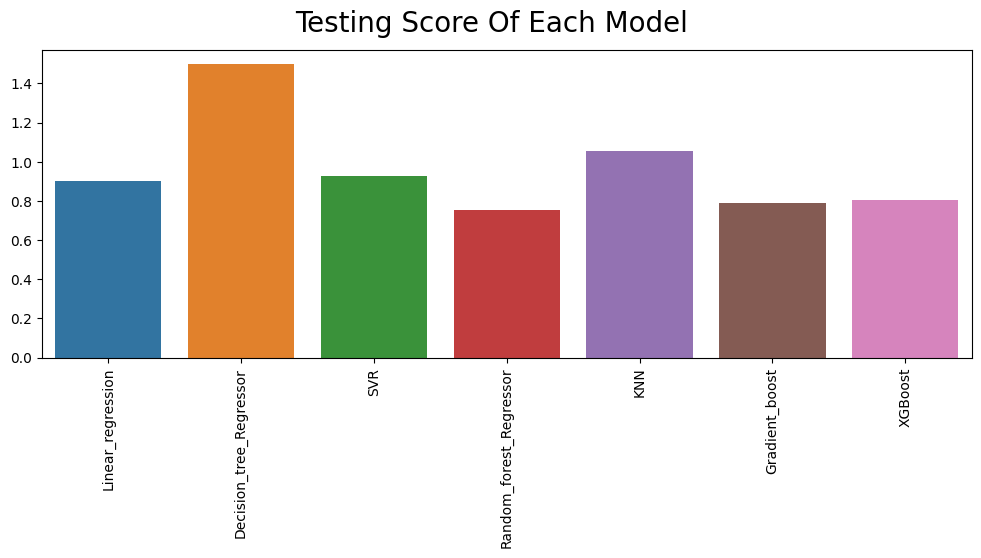

In [74]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_test_performance)
plt.xticks(rotation=90)
plt.suptitle('Testing Score Of Each Model',fontsize=20)